In [17]:
import numpy as np
import math
from scipy.stats import norm, chi2

In [18]:
# Начальное значение
y = 2356457

In [19]:
def LFSR():
    p = 32
    a = 843314861
    c = 453816693
    length = 12000
    M = pow(2, p - 1)
    global y
    y = (a * y + c) % M
    return (y/M)

In [20]:
# Нормальная случайная величина по методу суммирования
def generate_normal():
  alpha = [LFSR() for i in range (1,12+1)]
  x = sum(alpha)-6
  return x + 1/(20*12) * (x**3 - 3*x)

In [21]:
def chi_square_normal(sample, means, variance, alpha):
  N = len(sample)
  k = int((1 + 3.3*math.log10(N))//1)
  h = (max(sample) -  min(sample))/k

  Ni = []
  p = []
  lb = min(sample)
  while lb < max(sample):
    count = 0
    for i in sample:
      if i < lb + h and i >= lb: count +=1
    if lb == min(sample):
      pi = norm.cdf(lb+h, means, math.sqrt(variance))
    elif lb == max(sample) - h:
      pi = 1 - norm.cdf(lb, means, math.sqrt(variance))
    else:
      pi = norm.cdf(lb + h, means, math.sqrt(variance)) - norm.cdf(lb, means, math.sqrt(variance))
    p.append(pi)
    Ni.append(count)
    lb = lb+h

  chi_square = 0
  for i in range(len(Ni)):
    chi_square += (Ni[i] - N*p[i])**2/(N*p[i])

  print(f"Значение хи-квадрат: {chi_square:.2f}")
  critical_value = chi2.ppf(1-alpha, df=k-1)

  print(f"Критическое значение хи-квадрат: {critical_value:.2f}")

  if chi_square > critical_value:
    print("Отвергаем нулевую гипотезу, значит распределение не является равномерным.")
  else:
    print("Принимаем нулевую гипотезу, значит аспределение является равномерным.")

Диагональная

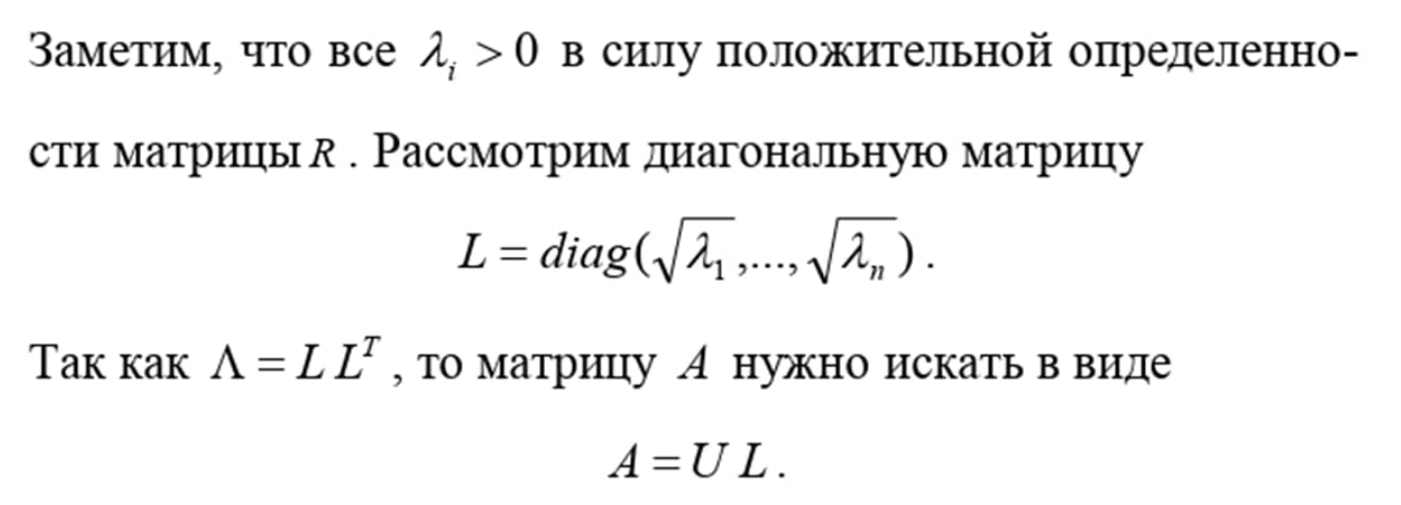

Треугольная

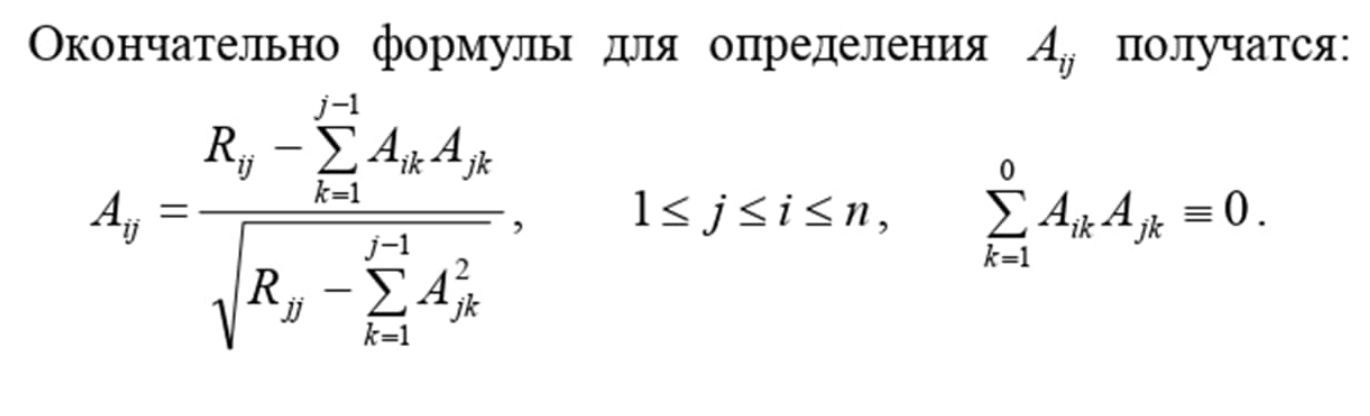

1. Написать подпрограмму генерирования одной реализации нормального случайного вектора с известными средними значениями компонент и матрицей ковариаций.


In [22]:
def is_symmetric(matrix, tol=1e-8):
    return np.allclose(matrix, matrix.T, atol=tol)

In [23]:

def generate_normal_random_vector(means, covMatrix, matrix_type='diagonal'):
    if len(means) != len(covMatrix) or len(covMatrix)!=len(covMatrix[0]):
        raise ValueError("Размеры вектора средних и матрицы ковариаций не совпадают")

    if matrix_type not in ['diagonal', 'triangular']:
        raise ValueError("Неправильно указан тип матрицы преобразования")
    if is_symmetric(covMatrix):
      if np.all(np.linalg.eigvals(covMatrix)>0):
        if matrix_type == 'diagonal':
            # Диагонализация матрицы ковариаций
            eigenvalues, eigenvectors = np.linalg.eig(covMatrix)
            diag = np.diag(np.sqrt(eigenvalues))

            # Построение матрицы преобразования A=U*L
            A = np.dot(eigenvectors, diag)
        else:  # Треугольная матрица
            A = np.zeros_like(covMatrix)
            for i in range(len(covMatrix[0])):
                for j in range(i+1):
                    if j == 0:
                        x = covMatrix[i][j] / math.sqrt(covMatrix[j][j])
                    else:
                        x = (covMatrix[i][j] - sum([A[i][k]*A[j][k] for k in range(j)])) / math.sqrt(covMatrix[j][j] - sum([A[j][k]**2 for k in range(j)]))
                    A[i][j] = x

        # Генерация случайного вектора из стандартного нормального распределения
        ni = np.array([generate_normal() for _ in range(len(covMatrix))])

        # Генерация случайного вектора с заданными средними значениями и матрицей ковариаций
        random_vector = np.dot(A, ni) + means

        return random_vector
      else:
        raise ValueError("Матрица не является положительно определенной")
    else:
      raise ValueError("Матрица не является симметричной")

*Задание 2*

In [24]:


# Задаем средние значения
means = np.array([0, 1, -1, 2])

# Задаем матрицу ковариации
covMatrix = np.array([[2, 0.5, 0.3, 0.2],
                      [0.5, 1, 0.4, 0.1],
                      [0.3, 0.4, 3, 0.6],
                      [0.2, 0.1, 0.6, 1]])

In [25]:
# Находим собственные числа
eigenvalues, _ = np.linalg.eig(covMatrix)
# Выводим собственные числа
print("Собственные числа матрицы ковариаций:")
for eigenvalue in eigenvalues:
   print(eigenvalue)

Собственные числа матрицы ковариаций:
3.3821137052161023
2.0272329374640408
0.7381233104293399
0.8525300468905155


Диагонализация R

In [26]:
random_vector = generate_normal_random_vector(means, covMatrix, matrix_type='diagonal')
print("Случайный вектор с нормальным распределением:", random_vector)

Случайный вектор с нормальным распределением: [-0.38432029  2.0016106   1.21156277  3.46878153]


In [27]:
random_vector = generate_normal_random_vector(means, covMatrix, matrix_type='triangular')
print("Случайный вектор с нормальным распределением:", random_vector)

Случайный вектор с нормальным распределением: [ 1.27208247 -0.64815725  0.76146449  3.10020672]


2. Сгенерировать выборку объема N=1000 реализаций нормального случайного вектора. Вектор средних и матрицу ковариаций задать самостоятельно.


In [28]:
sample_diagonal = [generate_normal_random_vector(means, covMatrix, 'diagonal') for _ in range(1000)]
sample_array = np.array(sample_diagonal)

print("Первые 5 значений выборки:")
print(sample_array[:5])

Первые 5 значений выборки:
[[-1.64772329  0.50447192 -1.94939689  0.52926725]
 [-0.86633954  1.27790432  0.45509645  3.17450288]
 [-0.01698054  2.04263183 -2.03280078  2.2678642 ]
 [ 0.06173361  1.12871558 -1.07962075  1.65730168]
 [-0.49983976  2.08462629 -0.30460124  1.79337922]]


In [29]:
sample_triangular = [generate_normal_random_vector(means, covMatrix, 'triangular') for _ in range(1000)]
sample_array = np.array(sample_triangular)

print("Первые 5 значений выборки:")
print(sample_array[:5])

Первые 5 значений выборки:
[[-0.19084574  2.53314559  2.79611737  1.7959172 ]
 [-2.41681441 -1.81458246 -2.21984326  0.99373218]
 [-1.43578514  0.44883552  0.98973879  1.19914467]
 [-0.20343951  1.3239609  -1.01385934  2.54343585]
 [-0.90982776  1.64482734 -0.33060176  2.1630148 ]]


**Задание 3**. По критерию хи-квадрат проверить нормальность всех компонент полученного вектора на уровне значимости alpha=0,05. Сравнить выборочные средние и матрицу ковариаций с теоретическими.

In [30]:
alpha = 0.05

# Диагонализация матрицы R
for i in range(len(covMatrix)):
  sample = [item[i] for item in sample_diagonal]
  print('\nТест хи-квадрат для распределения N({}, {})'.format(means[i], covMatrix[i][i]))
  chi_square_normal(sample, means[i], covMatrix[i][i], alpha)


Тест хи-квадрат для распределения N(0, 2.0)
Значение хи-квадрат: 9.33
Критическое значение хи-квадрат: 16.92
Принимаем нулевую гипотезу, значит аспределение является равномерным.

Тест хи-квадрат для распределения N(1, 1.0)
Значение хи-квадрат: 6.94
Критическое значение хи-квадрат: 16.92
Принимаем нулевую гипотезу, значит аспределение является равномерным.

Тест хи-квадрат для распределения N(-1, 3.0)
Значение хи-квадрат: 8.49
Критическое значение хи-квадрат: 16.92
Принимаем нулевую гипотезу, значит аспределение является равномерным.

Тест хи-квадрат для распределения N(2, 1.0)
Значение хи-квадрат: 8.33
Критическое значение хи-квадрат: 16.92
Принимаем нулевую гипотезу, значит аспределение является равномерным.


In [31]:
print('Теоретическое среднее:')
for i in range(len(covMatrix)):
  print(means[i])
print('\nВыборочное среднее:')
for i in range(len(covMatrix)):
  sample = [item[i] for item in sample_diagonal]
  print(round(np.mean(sample), 2))

Теоретическое среднее:
0
1
-1
2

Выборочное среднее:
-0.09
0.96
-0.99
2.01


In [32]:
print('Теоретическая матрица ковариации:')
for i in range(len(covMatrix)):
  print(covMatrix[i])
print('\nВыборочная матрица ковариации:')
for row in np.cov(sample_diagonal, rowvar=0):
  print([round(i, 2) for i in row])

Теоретическая матрица ковариации:
[2.  0.5 0.3 0.2]
[0.5 1.  0.4 0.1]
[0.3 0.4 3.  0.6]
[0.2 0.1 0.6 1. ]

Выборочная матрица ковариации:
[np.float64(1.91), np.float64(0.46), np.float64(0.33), np.float64(0.28)]
[np.float64(0.46), np.float64(0.99), np.float64(0.42), np.float64(0.13)]
[np.float64(0.33), np.float64(0.42), np.float64(2.78), np.float64(0.6)]
[np.float64(0.28), np.float64(0.13), np.float64(0.6), np.float64(1.04)]


In [33]:
alpha = 0.05
# Треугольная матрица A
for i in range(len(covMatrix)):
  sample = [item[i] for item in sample_triangular]
  print('\nТест хи-квадрат для распределения N({}, {})'.format(means[i], covMatrix[i][i]))
  chi_square_normal(sample, means[i], covMatrix[i][i], alpha)


Тест хи-квадрат для распределения N(0, 2.0)
Значение хи-квадрат: 9.05
Критическое значение хи-квадрат: 16.92
Принимаем нулевую гипотезу, значит аспределение является равномерным.

Тест хи-квадрат для распределения N(1, 1.0)
Значение хи-квадрат: 16.07
Критическое значение хи-квадрат: 16.92
Принимаем нулевую гипотезу, значит аспределение является равномерным.

Тест хи-квадрат для распределения N(-1, 3.0)
Значение хи-квадрат: 8.84
Критическое значение хи-квадрат: 16.92
Принимаем нулевую гипотезу, значит аспределение является равномерным.

Тест хи-квадрат для распределения N(2, 1.0)
Значение хи-квадрат: 3.71
Критическое значение хи-квадрат: 16.92
Принимаем нулевую гипотезу, значит аспределение является равномерным.


In [34]:
print(sample_triangular)

[array([-0.19084574,  2.53314559,  2.79611737,  1.7959172 ]), array([-2.41681441, -1.81458246, -2.21984326,  0.99373218]), array([-1.43578514,  0.44883552,  0.98973879,  1.19914467]), array([-0.20343951,  1.3239609 , -1.01385934,  2.54343585]), array([-0.90982776,  1.64482734, -0.33060176,  2.1630148 ]), array([-1.57236845,  1.96212476, -0.23294664,  2.6122992 ]), array([-2.32327415,  2.4136378 ,  0.31034361,  1.00283526]), array([-1.8610912 ,  0.28155847,  0.09243455,  0.49663108]), array([0.33526547, 2.18303825, 0.89244974, 3.17389031]), array([-2.21507064,  1.38789929,  1.21909121,  2.5667503 ]), array([-1.22416817,  1.49479865,  2.15673491,  5.21861451]), array([1.68438326, 2.33946128, 1.49358588, 1.0905684 ]), array([ 0.01527144,  0.79055249, -2.99203374,  1.94491225]), array([1.2860318 , 1.50187628, 0.50583541, 1.43758488]), array([-1.73415962,  0.91698002, -0.55224387,  0.90995795]), array([-0.844698  , -0.09267251, -4.09763116,  1.80470024]), array([ 0.19414361,  1.09552676, -1

In [35]:
print('Теоретическое среднее:')
for i in range(len(covMatrix)):
  print(means[i])
print('\nВыборочное среднее:')
for i in range(len(covMatrix)):
  sample = [item[i] for item in sample_triangular]
  print(round(np.mean(sample), 2))

Теоретическое среднее:
0
1
-1
2

Выборочное среднее:
-0.03
0.93
-1.0
2.01


In [36]:
print('Теоретическая матрица ковариации:')
for i in range(len(covMatrix)):
  print(covMatrix[i])
print('\nВыборочная матрица ковариации:')
for row in np.cov(sample_diagonal, rowvar=0):
  print([round(i, 2) for i in row])

Теоретическая матрица ковариации:
[2.  0.5 0.3 0.2]
[0.5 1.  0.4 0.1]
[0.3 0.4 3.  0.6]
[0.2 0.1 0.6 1. ]

Выборочная матрица ковариации:
[np.float64(1.91), np.float64(0.46), np.float64(0.33), np.float64(0.28)]
[np.float64(0.46), np.float64(0.99), np.float64(0.42), np.float64(0.13)]
[np.float64(0.33), np.float64(0.42), np.float64(2.78), np.float64(0.6)]
[np.float64(0.28), np.float64(0.13), np.float64(0.6), np.float64(1.04)]
